In [1]:
import cartopy 
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
#from __future__ import print_function
import cartopy.crs as ccrs
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.basemap import Basemap

In [2]:
def scale_bar(ax, length=None, location=(.85,.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')
    

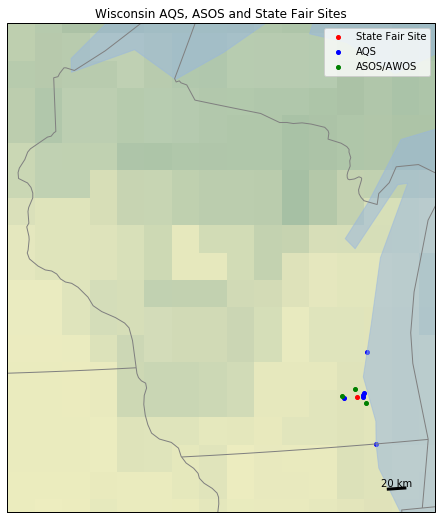

In [3]:

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.stock_img()
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#WI State Fair Location
plt.scatter(-88.015, 43.0197  , marker ='o', s=16, color='red', label='State Fair Site',
            transform=cartopy.crs.PlateCarree()) 

#AQS 55-079-0099 24 hours Ramsey County  ~ 7km or 4 miles 
plt.scatter(-87.925, 43.041  , marker ='o', s=16, color='blue',
            transform=cartopy.crs.PlateCarree()) 
#AQS 55-133-0027 24 hours 1310 Cleveland Ave. Waukesha ~16km or 9 miles 
plt.scatter(-88.215033, 43.0200694 , marker ='o', s=16, color='blue', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS 55-079-0010 HOURLY Samples 1337 S. 16th St. Mil ~7km or 4miles 
plt.scatter(-87.93333, 43.01667 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 55-079-0026  24hour sample Milwaukee Ser DNR HDQRS  ~10km or 5 miles
plt.scatter(-87.91, 43.06 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 55-059-0019 hourly Pleasant Praire- Chinwaukee Praire ~60km or 32 miles
plt.scatter(-87.81, 42.50 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree())
#AQS 55-089-0009 hourly HarringtonBeach PArk hourly  ~56km or 30 miles
plt.scatter(-87.81, 43.50, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 

#AWOS  KUES  ~18km or 10 miles 
plt.scatter(-88.2371, 43.041  , marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AWOS K21D ~10km or 6miles
plt.scatter(-88.0344 , 43.1104  , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 
#ASOS KMKE ~ 13km or 7 mile
plt.scatter(-87.897 , 42.947  , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 

plt.title('Wisconsin AQS, ASOS and State Fair Sites')

leg = ax.legend();
plt.savefig('WIGeography.png')
ax.set_extent([-93,-87,47,42])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


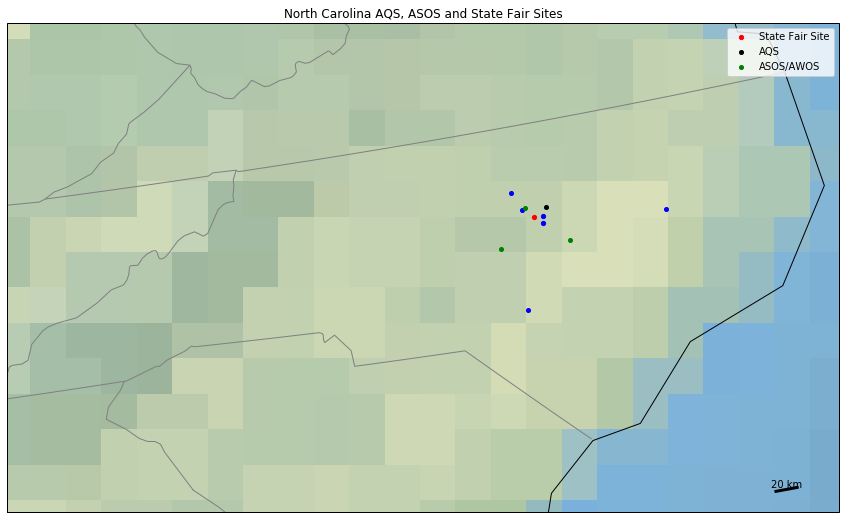

In [4]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#North Carolina State Fair Coordinates 
plt.scatter(-78.7078, 35.7947  , marker ='o', s=18, color='red', label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS 37-183-0020 24 hours ~10km or 6miles 
plt.scatter(-78.6288, 35.7288  , marker ='o', s=18, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS ***37-183-00215 24 hours ~8km or 4miles 
plt.scatter(-78.619, 35.790  , marker ='o', s=18, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS Milbrook 37-183-00014 1 hour WAke County NE of site  ~14km or 7miles
plt.scatter(-78.57417, 35.85611 , marker ='o', s=16, color='black', label='AQS', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 37-183-0021 Triple Oak 1 hour  ~13km or 7miles 
plt.scatter(-78.8197, 35.8652 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 37-063-0015 24 hour Durham Armory ~31 miles or 17km
plt.scatter(-78.90, 36.03 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 37-147-0006 24 hour Greenville NC ~123km or  66miles
plt.scatter(-77.36, 35.64, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 37-051-0009 1 hour Fayetteville 87km or 47miles
plt.scatter(-78.95, 35.04, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 

#ASOS  *** KRDU ~12km or 6mi
plt.scatter(-78.788, 35.878  , marker ='o', s=16, color='green', label='ASOS/AWOS', 
            transform=cartopy.crs.PlateCarree()) 

#AWOS III KTTA ~43km or 23mi
plt.scatter(-79.1008, 35.5837 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 
#AWOS KJNX ~ 40km or 22mi
plt.scatter(-78.3903, 35.5409  , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 

plt.title('North Carolina AQS, ASOS and State Fair Sites')

leg = ax.legend();
plt.savefig('NCGeography.png')
ax.set_extent([-84,-76,37,34])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


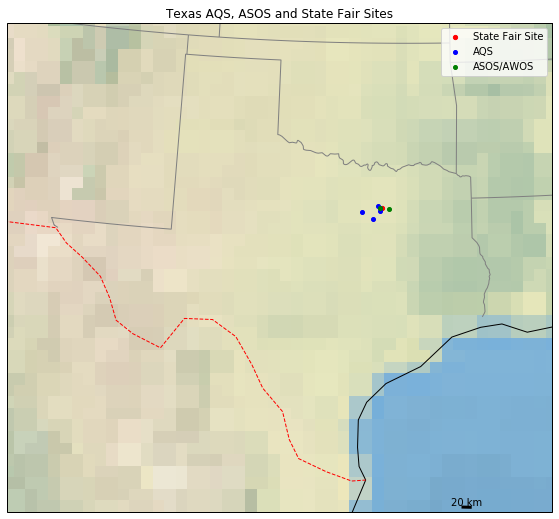

In [5]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#Texas State Fair Coordinates 
plt.scatter(-96.759133, 32.777  , marker ='o', s=18, color='red',label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS ** 717 South Akard 48-113-0050 Active 24 hour  ~4km or 2miles
plt.scatter(-96.7976, 32.7746 , marker ='o', s=16, color='blue', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS 48-113-3004  24 hour ~9km or 5mi
plt.scatter(-96.8033, 32.71 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS4 48-113-0069 1 hour Lancaster, Tx ~11km or 6miles 
plt.scatter(-96.86, 32.82, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS48-139-0016 24 hour  Midlothian ~4k2km or 22mi
plt.scatter(-97.03, 32.48, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 43-113-0035  24 hour Fort Worth ~56km or 30 mi
plt.scatter(-97.34, 32.66, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 

#AWOS ** K49T ~4k or 2mi
plt.scatter(-96.803475, 32.780879  , marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AWOS III KHQZ ~22km or 12mi
plt.scatter(-96.5304, 32.747 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 

plt.title('Texas AQS, ASOS and State Fair Sites')
#ax.axis('equal')
leg = ax.legend();
plt.savefig('TXGeography.png')
ax.set_extent([-107,-92,37,25])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


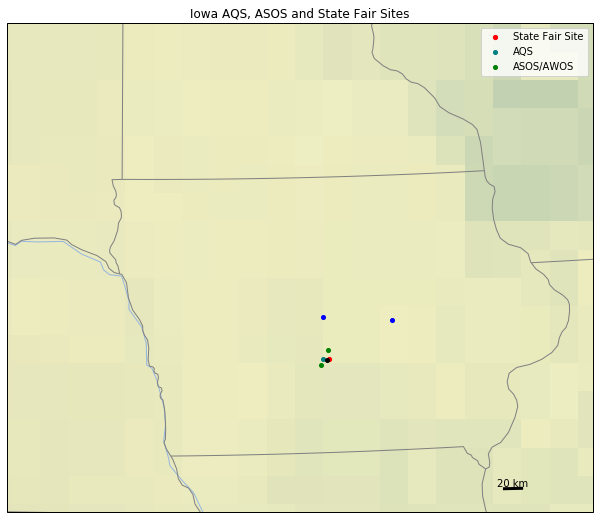

In [7]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#Iowa State Fair Coordinates 
plt.scatter(-93.5535, 41.5957, marker ='o', s=18, color='red',label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS 19-153-0030  This one takes hourly measurements! ~7km or 4mi
plt.scatter(-93.64, 41.60, marker ='o', s=16, color='teal', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS 19-153-0059 24 hour ~3km or 2mi
plt.scatter(-93.58385, 41.583183 , marker ='o', s=16, color='black', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 19-169-2530 ~58km or 31mi  24 hours
plt.scatter(-93.614, 42.04137, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 19-171-0007 ~86km or 47mi 24 hours
plt.scatter(-92.6522, 41.987, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 

#ASOS KDSM 11km or 6mi
plt.scatter(-93.663, 41.534, marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AWOS KIKV 11km or 6mi
plt.scatter(-93.5664 , 41.6914 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 

plt.title('Iowa AQS, ASOS and State Fair Sites')
leg = ax.legend();
plt.savefig('IAGeography.png')
ax.set_extent([-98,-90,40,45])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


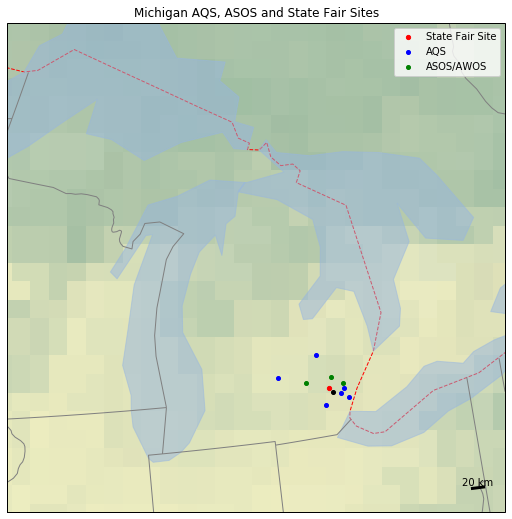

In [8]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#Michigan State Fair Coordinates 
plt.scatter(-83.5038, 42.4898, marker ='o', s=18, color='red',label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS **26-163-0093 hourly ~23km or 12mi
plt.scatter(-83.266, 42.38599, marker ='o', s=16, color='blue', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS 26-163-0100 39km or21mi
plt.scatter(-83.10, 42.31 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 26-125-0001 24 hour ~27km or 14mi
plt.scatter(-83.18, 42.46 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 26-161-0008 24hour  29km or 16m
plt.scatter(-83.60, 42.24, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS ***26-163-0095 24 hour SE of site closest  ~10km or 5mi
plt.scatter(-83.425, 42.421, marker ='o', s=16, color='black', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 26-065-0018 24 hour ~91km or 41mi
plt.scatter(-84.56, 42.76 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 26-049-0021 1 hour ~64km or 34mi
plt.scatter(-83.67, 43.05 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 

#AWOS KVLL  ~27km or 15mi
plt.scatter(-83.1779, 42.5429, marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AWOS KOZW ~42km and 23mi
plt.scatter(-83.9821 , 42.6292 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 
#ASOS KPTK ** closest  20km or 11mi
plt.scatter(-83.42 , 42.66 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 

plt.title('Michigan AQS, ASOS and State Fair Sites')
leg = ax.legend();
plt.savefig('IAGeography.png')
ax.set_extent([-90,-80,41,48])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


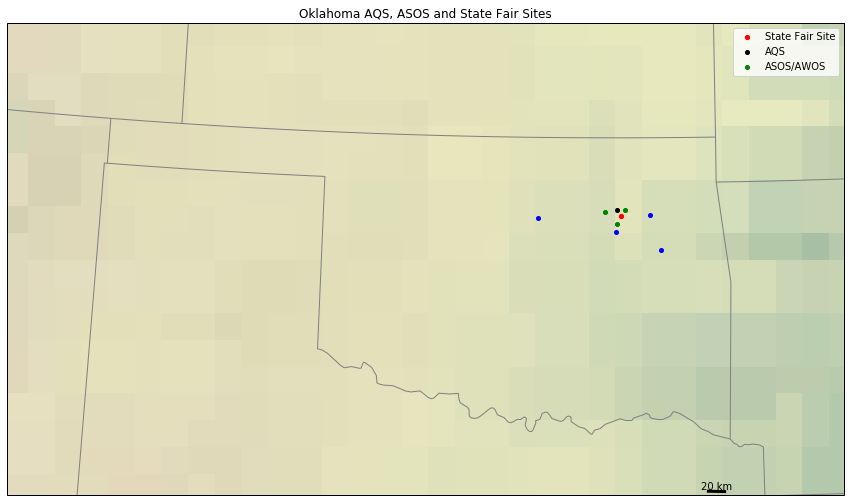

In [9]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#Tulsa State Fair Coordinates 
plt.scatter(-95.9311, 36.1356, marker ='o', s=18, color='red',label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS 40-143-1127 24 hour ~8km or 5mi
plt.scatter(-95.98, 36.20, marker ='o', s=16, color='black', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS 40-143-0110  24 hour ~36km or 20mi
plt.scatter(-95.525, 36.140 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 40-143-0174 1 hour ~22km or 12 mi
plt.scatter(-96.00, 35.95 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 40-101-0169  24 hour ~65km OR 35mi
plt.scatter(-95.377, 35.755, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 40-1119-0614 24 hourly ~101km or 55mi
plt.scatter(-97.059, 36.107, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 

#ASOS KRVS  ~12km or 6mi
plt.scatter(-95.985, 36.04, marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AWOS KOWP ~20km or 11mi
plt.scatter(-96.1518 , 36.1752 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 
#ASOS  **** KTUL  8km or 4mi
plt.scatter(-95.88 , 36.198 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 

plt.title('Oklahoma AQS, ASOS and State Fair Sites')
leg = ax.legend();
plt.savefig('IAGeography.png')
ax.set_extent([-104,-93,33,38])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


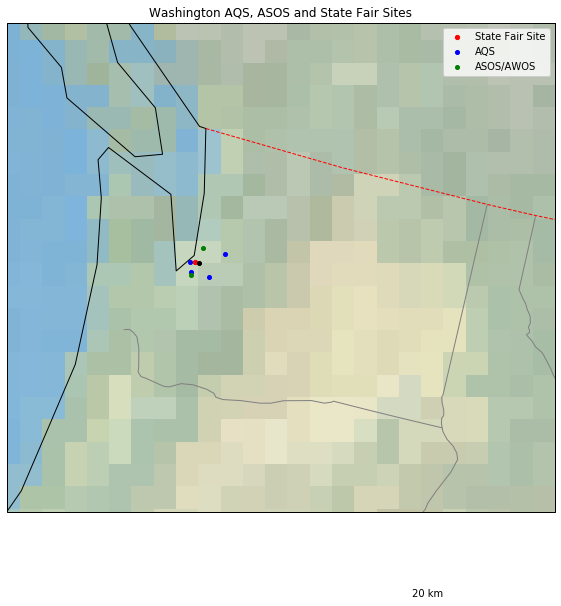

In [8]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#Washington State Fair Coordinates 
plt.scatter(-122.2966, 47.2824  , marker ='o', s=18, color='red',label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS 53-033-0023 24 hour ~31km or 17m
plt.scatter(-121.937, 47.1411 , marker ='o', s=16, color='blue', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS 53-053-1018 24 hour  ~16km or 9 mi
plt.scatter(-122.3003, 47.14 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 53-053-0024 hourly  ~14km or 7 mi
plt.scatter(-122.46, 47.23, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 53-053-0029 hourly  ~15km or 8mi
plt.scatter(-122.45, 47.19, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS *** 53-033-0089 hourly ~6km or 3mi
plt.scatter(-122.2144, 47.287, marker ='o', s=16, color='black', 
            transform=cartopy.crs.PlateCarree()) 
#AQS **53-053-0031  24 hour ~7km or 4mi
plt.scatter(-122.3858, 47.265, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 53-067-0013  24 hour *null comparrison SW  ~46km or 25mi
plt.scatter(-121.77, 47.4902, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 


#ASOS KRNT  ~24km or 13mi
plt.scatter(-122.216, 47.493  , marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AWOS KPLU ~20km or 11mi
plt.scatter(-122.287, 47.1039, marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 

plt.title('Washington AQS, ASOS and State Fair Sites')
#ax.axis('equal')
leg = ax.legend();
plt.savefig('TXGeography.png')
ax.set_extent([-125,-116,45,50])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


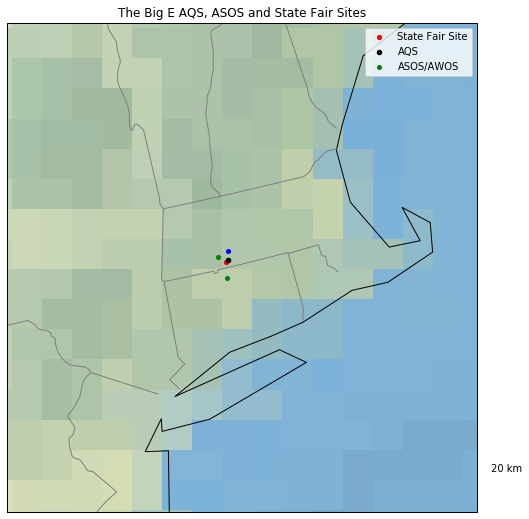

In [11]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#Eastern States State Fair Coordinates 
plt.scatter(-72.619, 42.0924, marker ='o', s=18, color='red',label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS 25-013-2007 24 hour springfield, ma ~2km or 1mi
plt.scatter(-72.5912, 42.100, marker ='o', s=20, color='black', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS 25-013-0018 hourly ~4km or 2mi
plt.scatter(-72.58, 42.12, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 25-013-0008 hourly ~12km or 6mi
plt.scatter(-72.56, 42.19 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 25-013-2009 24 hour springfield, ma ~ 2km or 1mi
plt.scatter(-72.597, 42.10579 , marker ='o', s=16, color='black', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 25-015-4002  hourly ~33km or 18mi
plt.scatter(-72.33, 42.3 , marker ='o', s=16, color='black', 
            transform=cartopy.crs.PlateCarree()) 

#ASOS KBAF ~11km or 6mi
plt.scatter(-72.716, 42.158, marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#ASOS KBDL ~17km or 9mi
plt.scatter(-72.663 , 41.939 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 


plt.title('The Big E AQS, ASOS and State Fair Sites')
leg = ax.legend();
plt.savefig('IAGeography.png')
ax.set_extent([-75,-70,40,44])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


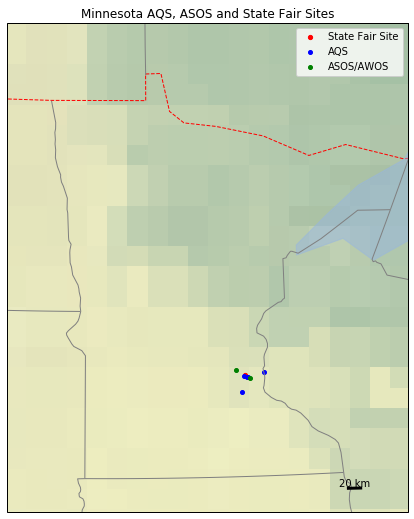

In [12]:

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.stock_img()
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#MN State Fair Location
plt.scatter(-93.168, 44.98  , marker ='o', s=18, color='red', label='State Fair Site',
            transform=cartopy.crs.PlateCarree()) 

#AQS Ramsey #27-123-0868  24 hour ~6km or 3mi
plt.scatter(-93.10, 44.95  , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS **27-123-1902 inactive  hourly readings ~4km or 2mi
plt.scatter(-93.1269, 44.957 , marker ='o', s=16, color='teal', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS ** 27-123-1908  hourly readings ~3km or 1mi
plt.scatter(-93.199, 44.973 , marker ='o', s=16, color='teal', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 27-163-0447  hourly nullcomp ~31km or 17mi
plt.scatter(-92.78, 45.02, marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS 037-0470 hourly nullcomp ~27km or 14mi
plt.scatter(-93.24, 44.74 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree())

#ASOS  KSTP **Closest  ~10km or 5mi
plt.scatter(-93.06, 44.935  , marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AsOS KMIC ~17km or 9mi
plt.scatter(-93.354 , 45.062  , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 
 

plt.title('Minnesota AQS, ASOS and State Fair Sites')

leg = ax.legend();
plt.savefig('WIGeography.png')
ax.set_extent([-98,-90,50,43])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()


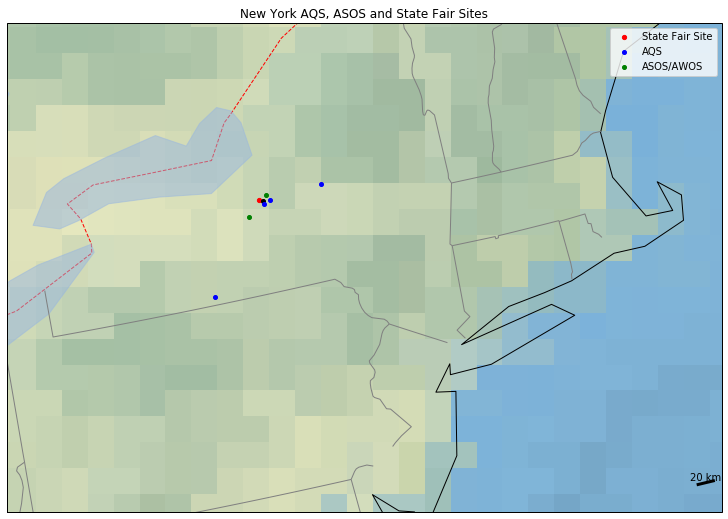

In [13]:
llx0= -98
llx1= -90
lly0= 42
lly1= 49

fig = plt.figure(figsize=(15,9)) #900 pixel wide, 600 pixel tall 
ax = plt.axes(projection=cartopy.crs.LambertConformal())#axis and projection quadrants  crs is project library
ax.add_feature(cartopy.feature.LAND)  #add feature
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle ='--', edgecolor ='red')
ax.add_feature(cartopy.feature.LAKES, alpha=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                            name = 'admin_1_states_provinces_lines',
                                           scale = '50m', facecolor= 'none')
ax.add_feature(states, edgecolor ='gray')
#NY State Fair Coordinates 
plt.scatter(-76.2216, 43.074, marker ='o', s=18, color='red',label='State Fair Site', 
            transform=cartopy.crs.PlateCarree()) 

#AQS Syracuse 36-067-1015 hourly ~13km or 6mi
plt.scatter(-76.06, 43.05, marker ='o', s=16, color='blue', label='AQS',
            transform=cartopy.crs.PlateCarree()) 
#AQS inactive syracuse 36-067-0019 24 hour ~5km or 3mi
plt.scatter(-76.164, 43.048 , marker ='o', s=16, color='black', 
            transform=cartopy.crs.PlateCarree()) 
#AQS inactive syracuse 36-067-0020 24 hour ~8km or 4mi
plt.scatter(-76.160, 43.02 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree()) 
#AQS inactive utica 36-065-2001 81km or 40mi
plt.scatter(-75.225, 43.098 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree())
#AQS corning 36-101-0003 hourly 136km or 73mi
plt.scatter(-77.21, 42.09 , marker ='o', s=16, color='blue', 
            transform=cartopy.crs.PlateCarree())

#ASOS KSYR ~10km or 6mi
plt.scatter(-76.106, 43.111, marker ='o', s=16, color='green', label='ASOS/AWOS',
            transform=cartopy.crs.PlateCarree()) 
#AwOS K6B9 ~25km or 14mi
plt.scatter(-76.4407 , 42.91 , marker ='o', s=16, color='green', 
            transform=cartopy.crs.PlateCarree()) 


plt.title('New York AQS, ASOS and State Fair Sites')
leg = ax.legend();
plt.savefig('IAGeography.png')
ax.set_extent([-80,-70,40,44])  #passes a list! sets limits Lat mix, lat max, long min, long max)
scale_bar(ax,20)
plt.show()
